# Introduction

This notebook generates traces for the Conlloovia experiments using two applications from the [Alibaba
  cluster-trace-gpu-v2020](https://github.com/alibaba/clusterdata/blob/master/cluster-trace-gpu-v2020/) traces. It assumes that the traces are already downloaded in this directory. Only two files are needed: `pai_job_table.csv` and `pai_job_table.header`.

In [1]:
import random

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({"font.size": 16,'lines.linewidth': 2.5})
matplotlib.rcParams['figure.figsize'] = [15, 7]

# Jobs table

In [4]:
df = pd.read_csv("pai_job_table.csv", header=None)
df.columns = pd.read_csv("pai_job_table.header").columns
df = df[df.start_time.notnull()]
df = df.sort_values(by="start_time")
df

,job_name,inst_id,user,status,start_time,end_time
866103,31fe7a4e1565891f332f2b33,4770ab9a93f5b311b629c66cfaa40ca41fb4485548b337...,74238accb90b,Failed,494319.0,NaN
866104,6be512ebc1890951ef8fe9a3,ce060ae257ddd9e6e3118c75ae95d3b8896da466eb9fe9...,74238accb90b,Failed,494326.0,NaN
866105,418cf3def0eaa3389c8c743f,187346e2a6bb3ce2dfec8bb9dcb237c8e1cf4de3b4bcb0...,74238accb90b,Failed,516002.0,NaN
866106,6ad04e6d3dd2c35e3a0c3e5f,9ef5598f518e76f7dd9a33fd55bbd00416f97b012ea83c...,74238accb90b,Failed,516023.0,NaN
324549,513df950b6b447b10d313d7e,a5ab20c0467c959bd361cfa8df613cff6e8f1d2c73ba6a...,74238accb90b,Running,520440.0,NaN
...,...,...,...,...,...,...
239174,f982e5e46efb7491fee0b251,7acc7f745ad511fc400baadb0103858168ad38b97bcc0b...,5f4cb64dc693,Terminated,6450891.0,6450979.0
239175,c3ec2fdc2c9851ec05821679,eb0a36ef06020dfc9201ff682dc8dd71e525dc7ce4fda5...,5f4cb64dc693,Terminated,6450909.0,6451003.0
191719,441a581d0e816f1a216fe771,7f9605cd188b61d450cff829d31f35c19fcd0dc976dec2...,dda07b53e47d,Terminated,6450959.0,6451074.0
125948,75f4a69009b038960c8fec99,0a82d1aae5585e275f137e0ce0bc8e8f6e70d695178169...,05b25af4dd8b,Terminated,6450964.0,6451092.0


In [5]:
df["datetime"] = pd.to_datetime(df.start_time, unit="s")

# Do this because they do it in their notebook
df["datetime"] = df["datetime"].dt.tz_localize('UTC').dt.tz_convert('Asia/Shanghai')
df

,job_name,inst_id,user,status,start_time,end_time,datetime
866103,31fe7a4e1565891f332f2b33,4770ab9a93f5b311b629c66cfaa40ca41fb4485548b337...,74238accb90b,Failed,494319.0,NaN,1970-01-07 01:18:39+08:00
866104,6be512ebc1890951ef8fe9a3,ce060ae257ddd9e6e3118c75ae95d3b8896da466eb9fe9...,74238accb90b,Failed,494326.0,NaN,1970-01-07 01:18:46+08:00
866105,418cf3def0eaa3389c8c743f,187346e2a6bb3ce2dfec8bb9dcb237c8e1cf4de3b4bcb0...,74238accb90b,Failed,516002.0,NaN,1970-01-07 07:20:02+08:00
866106,6ad04e6d3dd2c35e3a0c3e5f,9ef5598f518e76f7dd9a33fd55bbd00416f97b012ea83c...,74238accb90b,Failed,516023.0,NaN,1970-01-07 07:20:23+08:00
324549,513df950b6b447b10d313d7e,a5ab20c0467c959bd361cfa8df613cff6e8f1d2c73ba6a...,74238accb90b,Running,520440.0,NaN,1970-01-07 08:34:00+08:00
...,...,...,...,...,...,...,...
239174,f982e5e46efb7491fee0b251,7acc7f745ad511fc400baadb0103858168ad38b97bcc0b...,5f4cb64dc693,Terminated,6450891.0,6450979.0,1970-03-16 23:54:51+08:00
239175,c3ec2fdc2c9851ec05821679,eb0a36ef06020dfc9201ff682dc8dd71e525dc7ce4fda5...,5f4cb64dc693,Terminated,6450909.0,6451003.0,1970-03-16 23:55:09+08:00
191719,441a581d0e816f1a216fe771,7f9605cd188b61d450cff829d31f35c19fcd0dc976dec2...,dda07b53e47d,Terminated,6450959.0,6451074.0,1970-03-16 23:55:59+08:00
125948,75f4a69009b038960c8fec99,0a82d1aae5585e275f137e0ce0bc8e8f6e70d695178169...,05b25af4dd8b,Terminated,6450964.0,6451092.0,1970-03-16 23:56:04+08:00


Let's add a column that assigns randomly each user to an application.

In [6]:
random.seed(42)
user_to_app = {}
for user in df.user.unique():
    user_to_app[user] = random.randint(0, 1)
    
df["app"] = df.user.map(user_to_app)
df

,job_name,inst_id,user,status,start_time,end_time,datetime,app
866103,31fe7a4e1565891f332f2b33,4770ab9a93f5b311b629c66cfaa40ca41fb4485548b337...,74238accb90b,Failed,494319.0,NaN,1970-01-07 01:18:39+08:00,0
866104,6be512ebc1890951ef8fe9a3,ce060ae257ddd9e6e3118c75ae95d3b8896da466eb9fe9...,74238accb90b,Failed,494326.0,NaN,1970-01-07 01:18:46+08:00,0
866105,418cf3def0eaa3389c8c743f,187346e2a6bb3ce2dfec8bb9dcb237c8e1cf4de3b4bcb0...,74238accb90b,Failed,516002.0,NaN,1970-01-07 07:20:02+08:00,0
866106,6ad04e6d3dd2c35e3a0c3e5f,9ef5598f518e76f7dd9a33fd55bbd00416f97b012ea83c...,74238accb90b,Failed,516023.0,NaN,1970-01-07 07:20:23+08:00,0
324549,513df950b6b447b10d313d7e,a5ab20c0467c959bd361cfa8df613cff6e8f1d2c73ba6a...,74238accb90b,Running,520440.0,NaN,1970-01-07 08:34:00+08:00,0
...,...,...,...,...,...,...,...,...
239174,f982e5e46efb7491fee0b251,7acc7f745ad511fc400baadb0103858168ad38b97bcc0b...,5f4cb64dc693,Terminated,6450891.0,6450979.0,1970-03-16 23:54:51+08:00,1
239175,c3ec2fdc2c9851ec05821679,eb0a36ef06020dfc9201ff682dc8dd71e525dc7ce4fda5...,5f4cb64dc693,Terminated,6450909.0,6451003.0,1970-03-16 23:55:09+08:00,1
191719,441a581d0e816f1a216fe771,7f9605cd188b61d450cff829d31f35c19fcd0dc976dec2...,dda07b53e47d,Terminated,6450959.0,6451074.0,1970-03-16 23:55:59+08:00,0
125948,75f4a69009b038960c8fec99,0a82d1aae5585e275f137e0ce0bc8e8f6e70d695178169...,05b25af4dd8b,Terminated,6450964.0,6451092.0,1970-03-16 23:56:04+08:00,1


In [8]:
# This is not exactly the same as their notebook, but adapted
offset = -600  # They later filter with hour>=0, so I understand that the first 600 hours are not valid
df['hourofyear'] = df.datetime.apply(lambda c: c.dayofyear * 24 + c.hour)

In [9]:
# Filter out values with an hour smaller than 600 because they seem not to be valid
df = df[df.hourofyear >= 600]
start = df.datetime.min()
end = df.datetime.max()
print(f"There is data from {start} to {end} ({end-start})")

There is data from 1970-01-25 00:00:03+08:00 to 1970-03-16 23:58:01+08:00 (50 days 23:57:58)


In [10]:
df2 = df.groupby(["datetime", "app"]).count().job_name.reset_index().set_index("datetime")
df2.rename(columns={"job_name": "requests"}, inplace=True)
df2

,app,requests
datetime,,
1970-01-25 00:00:03+08:00,1,1
1970-01-25 00:00:08+08:00,1,1
1970-01-25 00:00:28+08:00,1,1
1970-01-25 00:00:38+08:00,0,1
1970-01-25 00:00:39+08:00,1,1
...,...,...
1970-03-16 23:54:51+08:00,1,1
1970-03-16 23:55:09+08:00,1,1
1970-03-16 23:55:59+08:00,0,1


In [11]:
per_h = df2.groupby([pd.Grouper(freq='1H'), "app"]).sum().reset_index()
per_h.rename(columns={"requests": "rph"}, inplace=True)
per_h

,datetime,app,rph
0,1970-01-25 00:00:00+08:00,0,457
1,1970-01-25 00:00:00+08:00,1,383
2,1970-01-25 01:00:00+08:00,0,152
3,1970-01-25 01:00:00+08:00,1,459
4,1970-01-25 02:00:00+08:00,0,101
...,...,...,...
2443,1970-03-16 21:00:00+08:00,1,417
2444,1970-03-16 22:00:00+08:00,0,237
2445,1970-03-16 22:00:00+08:00,1,171
2446,1970-03-16 23:00:00+08:00,0,260


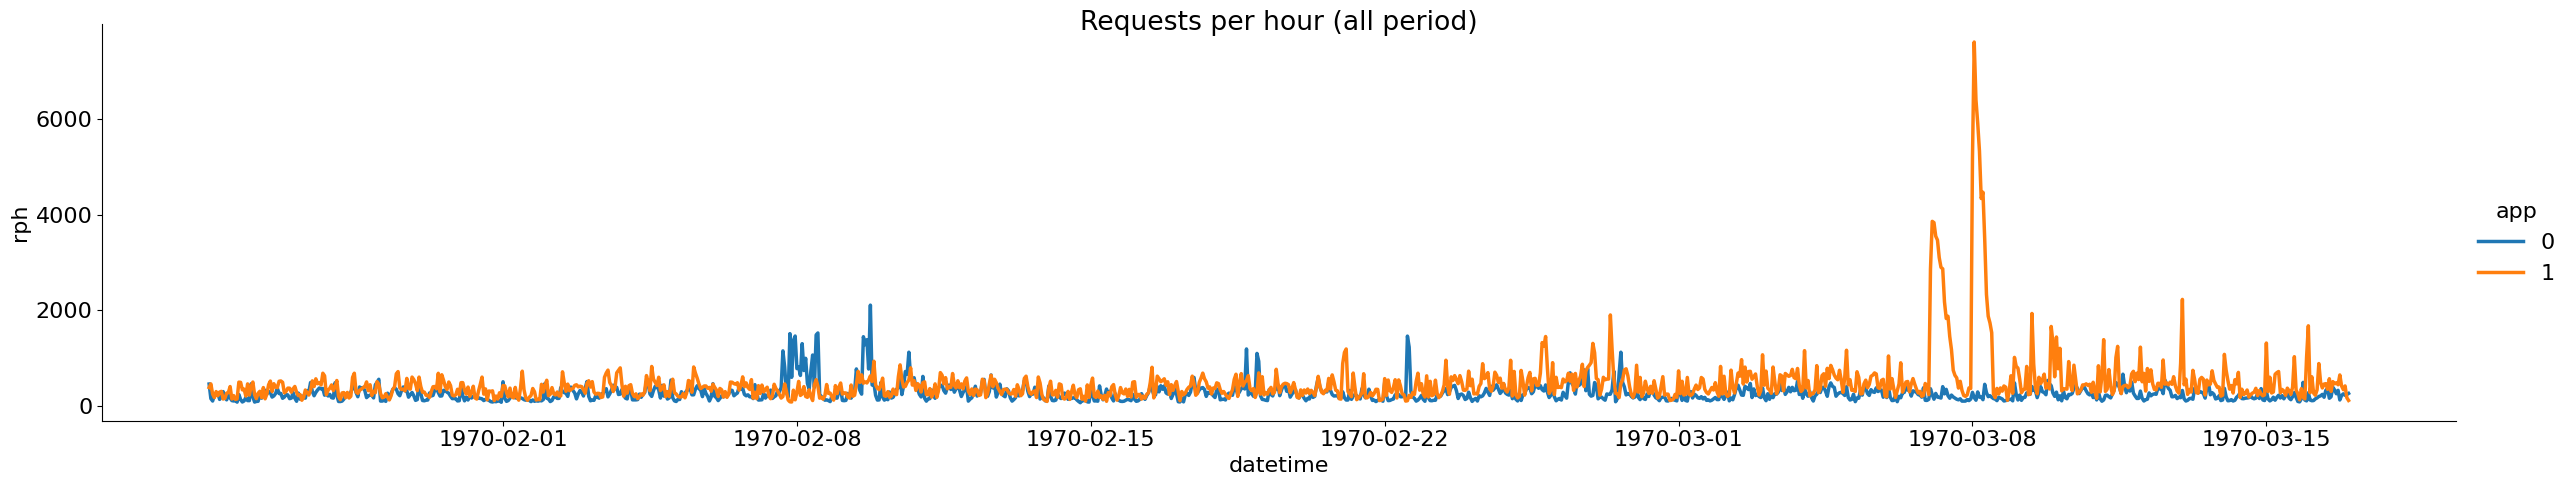

In [12]:
g = sns.relplot(data=per_h, x="datetime", y="rph",
           hue="app",
           kind="line", aspect=5)
_ = g.fig.suptitle("Requests per hour (all period)")

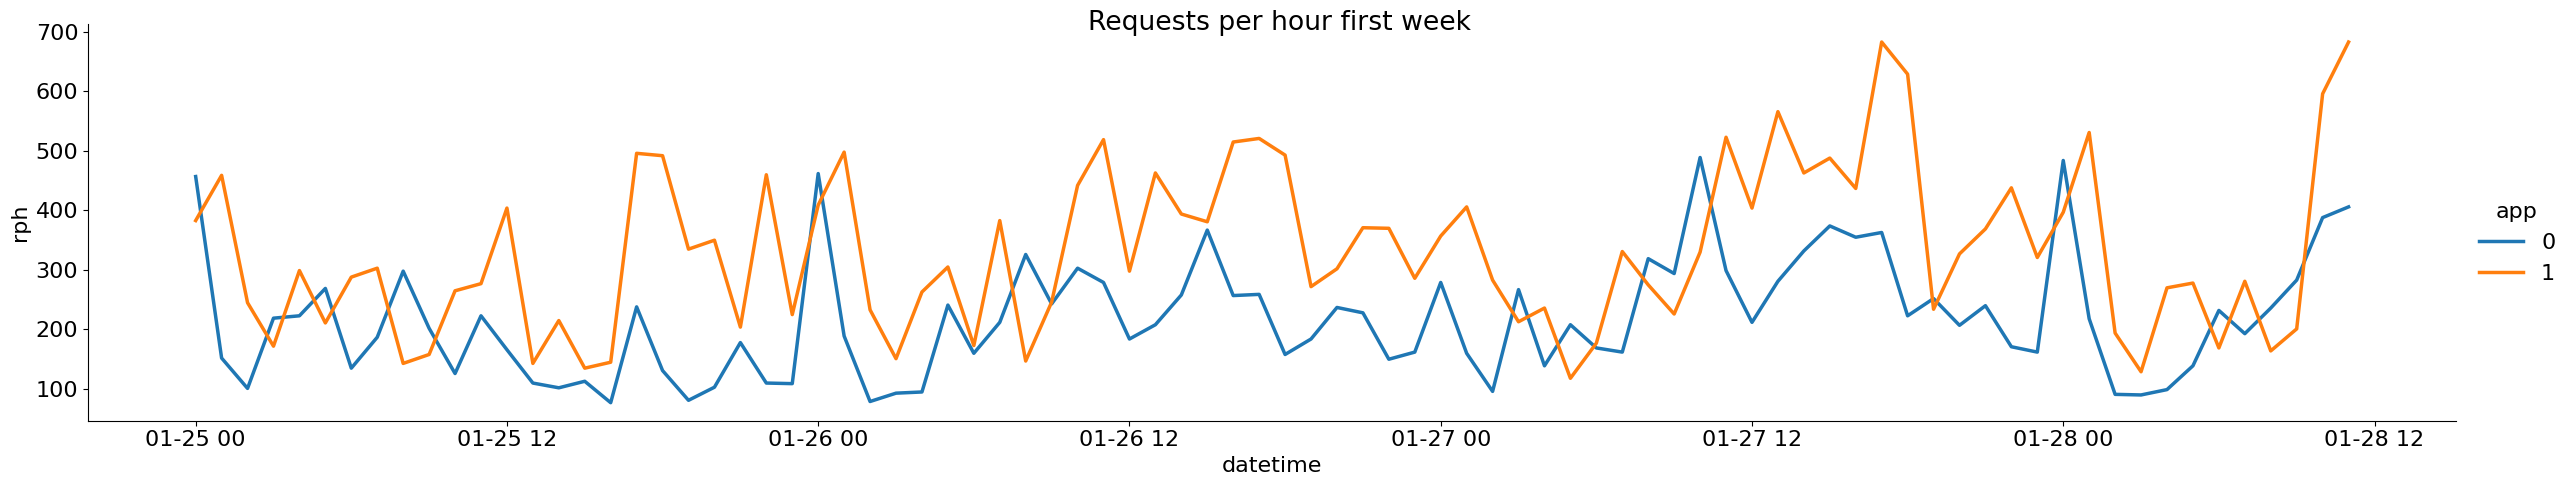

In [13]:
# Plot only first values
hours = 24*7
g = sns.relplot(data=per_h.iloc[:hours], x="datetime", y="rph",
           hue="app",
           kind="line", aspect=5)

_ = g.fig.suptitle("Requests per hour first week")

In [14]:
df2.describe()

,app,requests
count,656757.000000,656757.000000
mean,0.587791,1.370411
std,0.492233,1.293946
min,0.000000,1.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,91.000000


In [15]:
# As we don't have data in all seconds, fill in missing seconds
df3 = df2.pivot(columns="app").fillna(0)
df3 = df3.resample("s").sum()
df3

requests     
app                              0    1
datetime                               
1970-01-25 00:00:03+08:00      0.0  1.0
1970-01-25 00:00:04+08:00      0.0  0.0
1970-01-25 00:00:05+08:00      0.0  0.0
1970-01-25 00:00:06+08:00      0.0  0.0
1970-01-25 00:00:07+08:00      0.0  0.0
...                            ...  ...
1970-03-16 23:57:57+08:00      0.0  0.0
1970-03-16 23:57:58+08:00      0.0  0.0
1970-03-16 23:57:59+08:00      0.0  0.0
1970-03-16 23:58:00+08:00      0.0  0.0
1970-03-16 23:58:01+08:00      0.0  1.0

[4406279 rows x 2 columns]

In [16]:
# Remove multiindex
df3.columns = df3.columns.droplevel()
df3.rename(columns={0: "app0", 1: "app1"}, inplace=True)
df3

app,app0,app1
datetime,,
1970-01-25 00:00:03+08:00,0.0,1.0
1970-01-25 00:00:04+08:00,0.0,0.0
1970-01-25 00:00:05+08:00,0.0,0.0
1970-01-25 00:00:06+08:00,0.0,0.0
1970-01-25 00:00:07+08:00,0.0,0.0
...,...,...
1970-03-16 23:57:57+08:00,0.0,0.0
1970-03-16 23:57:58+08:00,0.0,0.0
1970-03-16 23:57:59+08:00,0.0,0.0


<Axes: xlabel='datetime'>

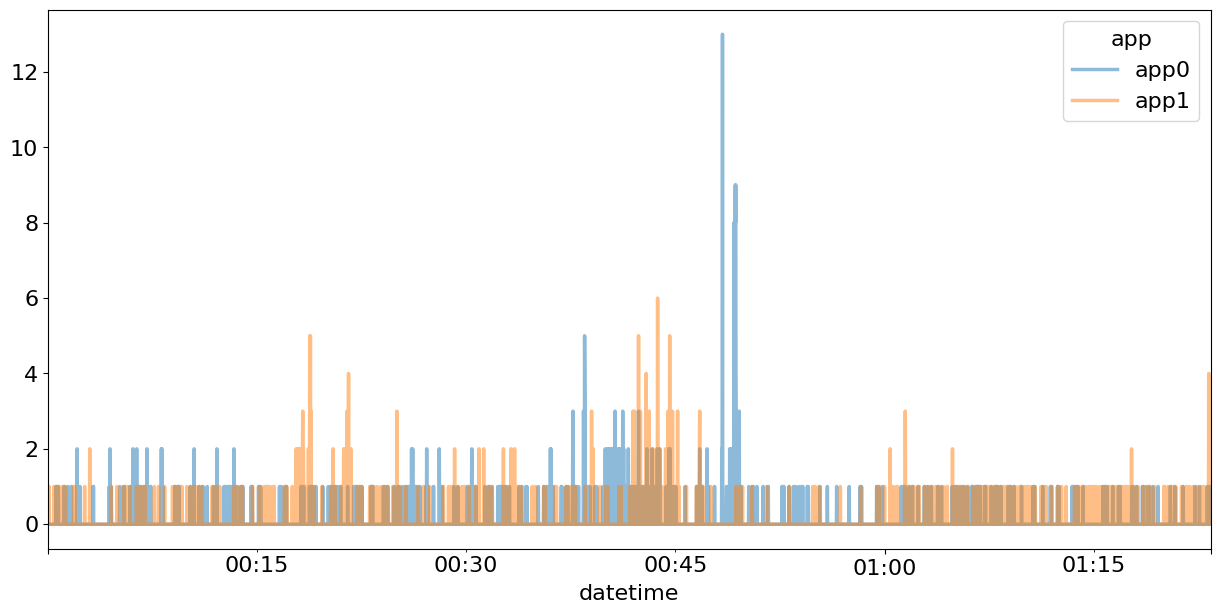

In [17]:
df3.iloc[:5000].plot(alpha=0.5)

# Generate traces

In [18]:
# Save original trace per second
df3.to_csv(f"alibaba_2apps_1s_p95.csv")

In [19]:
slot_sizes = [1, 5, 15, 60]
agg = {}
for slot_size_min in slot_sizes:
    slot_size_pandas = f"{slot_size_min}T"
    agg[slot_size_min] = df3.resample(slot_size_pandas).quantile(q=0.95) * slot_size_min * 60

In [20]:
# Save aggregated traces
for i in slot_sizes:
    agg[i].to_csv(f"alibaba_2apps_{i}T_p95.csv")

In [21]:
!head alibaba_2apps_60T_p95.csv

datetime,app0,app1
1970-01-25 00:00:00+08:00,3600.0,3600.0
1970-01-25 01:00:00+08:00,0.0,3600.0
1970-01-25 02:00:00+08:00,0.0,3600.0
1970-01-25 03:00:00+08:00,3600.0,0.0
1970-01-25 04:00:00+08:00,3600.0,3600.0
1970-01-25 05:00:00+08:00,3600.0,0.0
1970-01-25 06:00:00+08:00,0.0,3600.0
1970-01-25 07:00:00+08:00,0.0,3600.0
1970-01-25 08:00:00+08:00,3600.0,0.0
